# Закономерности, определяющие успешность игры

Исполнитель: Дмитриева Ксения

# Техническое задание. Описание
1. Заказчик: интернет-магазин "Стримчик". 
2. Деятельность: продажа компьютерных игр по всему миру.  
3. Исходные данные: данные в файле "games.csv" предоставил Заказчик
4. Описание данных:<br> 

Name — название игры<br> 
Platform — платформа<br> 
Year_of_Release — год выпуска<br> 
Genre — жанр игры<br> 
NA_sales — продажи в Северной Америке (миллионы проданных копий)<br> 
EU_sales — продажи в Европе (миллионы проданных копий)<br> 
JP_sales — продажи в Японии (миллионы проданных копий)<br> 
Other_sales — продажи в других странах (миллионы проданных копий)<br> 
Critic_Score — оценка критиков (максимум 100)<br>
User_Score — оценка пользователей (максимум 10)<br> 
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). N/B/ Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию («Для взрослых», «Для детей младшего возраста», «Для подростков»).<br> 


# Цель работы
Задание: выявить закономерности, которые будут опредлять успешность игры.<br> 
Это позволит в дальнейшем сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год. <br> 

# Ход выполнения работы

#### Изучить файл с данными "games.csv"<br>
#### Предобработка данных <br> 
• корректировка названия столбцов; <br> 
• преобразование данных в корректные типы; <br> 
• обработка пропусков данных пропуски при необходимости.<br><br>

#### Исследовательский анализ данных <br> 
• подсчёт суммарных продаж во всех регионах; <br> 
• изучить, сколько игр выпускалось в разные годы;<br> 
• изучить, как менялись продажи по игровым платформам;<br> 
• определить актуальный период данных для построения прогнозов на 2017;<br> 
• определить потенциально прибыльные платформы;<br> 
• изучить влияние на продажи внутри самой популярной платформы отзывы пользователей и критиков;<br> 
• изучить общее распределение игр по жанрам;<br>
• изучить влияет ли рейтинг ESRB на продажи в разных регионах<br>

#### Портрет пользователя каждого региона<br>
Определить для пользователя каждого региона (NA, EU, JP):<br> 
• Самые популярные платформы (топ-5). Описать различия в долях продаж.<br> 
• Самые популярные жанры (топ-5). Пояснить разницу.<br> 
• Влияет ли рейтинг ESRB на продажи в отдельном регионе?<br><br> 

#### Проверка гипотез<br> 
• Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;<br> 
• Средние пользовательские рейтинги жанров Action (англ.<br> 
«действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.<br><br> 

#### Вывод. Рекоммендации


## 1. Изучить файл с данными  "games.csv"

In [1]:
import pandas as pd
import numpy as np

In [2]:
#читаю предоставленный файл
try:
    data = pd.read_csv('C://Users//Admin//Desktop//practicum//sb_project_1//games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')
data.head(10)

Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN  
2     15.68     12.76      3.79         3.29          82.0        8.3      E  
3     15.61     10.93      3.28         2.95          80.0          8      E  
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN  
6     11.28      9.14      6.50         2.88          89.0        8.5      E  
7     13.96      9.18      2.93         2.84          58.0        6.6      E  
8     14.44      6.94      4.70         2.24          87.0        8.4      E  
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN

Имеются пропущенные значения. Столбцы нужно привести к нижнему регистру для удобства работы с таблицей

In [3]:
#создаю переменные для сохранения первичных резульатов, чтобы в выводах можно было сравнить до/после
dupls = data.duplicated().sum()
nans = data.isna().sum()
infs = data.info()

#вывожу значния
print(infs)
print('\nКоличество пропусков:', '\n', nans , '\n')
print('\nЧисло явных дубликатов:','\n', dupls , '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

Количество пропусков: 
 Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       

Явных дубликатов нет, присутствует значительное количество пропусков в оценках, присутствуют некорректные типы данных

In [4]:
#изучаю сколько в процентном соотношении данных пропущено
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

Данные, имеющие менее 5% пропущенных значений, не влияют на исследовательский анализ. Для остальных данных можно попробовать восстановить значения, где возможно. 

In [5]:
#описание данных
descr = data.describe()
descr

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

Самая рання выпущенная игра в данной таблице - 1980 год. Самая поздняя 2016. Есть подозрение на выборсы по продажам игр 

### ВЫВОД по ознакомлению с данными
Явные дубликаты отсутствуют.
<br>Все колонки начинаются с заглавной буквы, необходимо привести к нижнему регистру.
<br><br>Имеются пропуски в данных в колонках: 
<br>Name                  2
<br>Year_of_Release     269
<br>Genre                 2
<br>Critic_Score       8578
<br>User_Score         6701
<br>Rating             6766
<br><br>Имеются некорректные типы данных в колонках:
<br>2   Year_of_Release  16446 non-null  float64 - должен быть формат даты или int 
<br>9   User_Score       10014 non-null  object - должен быть формат float


## 2. Предобработка данных

In [6]:
#привожу к нижнему регистру названия столбцов
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Столбец ['name']

In [7]:
#изучаю уникальные названия игр
print('Всего уникальных наименований игр:', len(data['name'].unique()))
print('Всего пропущно значений:', data['name'].isna().sum())
data['name'].drop_duplicates()
data['name'].shape

Всего уникальных наименований игр: 11560
Всего пропущно значений: 2


(16715,)

In [8]:
#нахожу два пропущенных значения 
data.loc[data['name'].isna()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

Непонятные данные о не понятной игре. Без рейтингов, без оценок, без имён. Эти данные можно исключить из анализа

In [9]:
data = data.dropna(subset=['name'])
data['name'].isna().sum()

0

Явных дубликатов в наименованиях игр нет. Нужно изучить на неявные дубликаты

### Столбец ['platform']

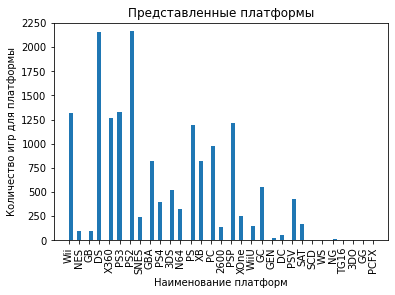


Всего уникальных наименований платформ: 31
Всего пропущно значений: 0


In [10]:
#изучаю уникальные платформы

import matplotlib.pyplot as plt
plt.hist(data['platform'], bins=75)
plt.title('Представленные платформы')
plt.xlabel('Наименование платформ')
plt.xticks(rotation = 90)
plt.ylabel('Количество игр для платформы')
plt.ylim(0, 2250)
plt.show()
print()
print('Всего уникальных наименований платформ:', len(data['platform'].unique()))
print('Всего пропущно значений:', data['platform'].isna().sum())


Больше всего игр для платформы Nintendo DS и Sony PS2

### Столбец ['year_of_release']

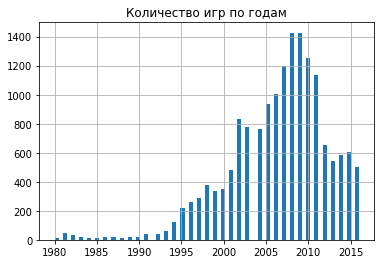

Всего уникальных годов выпуска игр: 38
Всего пропущно значений: 269
Процент пропущенных значений = 1.6095255190570215


In [11]:
#изучаю колонку год релиза
data['year_of_release'].hist(bins=75)
plt.title('Количество игр по годам')
plt.show()

print('Всего уникальных годов выпуска игр:', len(data['year_of_release'].unique()))
print('Всего пропущно значений:', data['year_of_release'].isna().sum())
print('Процент пропущенных значений =', data['year_of_release'].isna().mean()*100)

In [12]:
#пропущено значений менее 5%, эти данные исключаю из таблицы
data = data.dropna(subset=['year_of_release'])
print('Всего пропущно значений:', data['year_of_release'].isna().sum())

Всего пропущно значений: 0


In [13]:
#удаляю точки после года и привожу к целочисленному значению
data['year_of_release'] = data["year_of_release"].astype(int)

### Столбец ['genre']

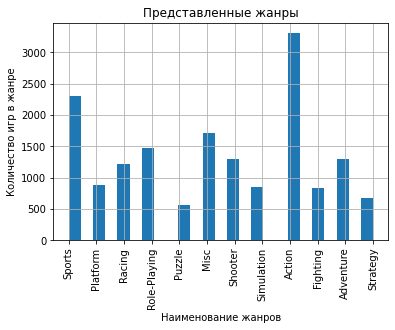

Всего уникальных наименований жанров: 12
Всего пропущно значений: 0


In [14]:
#изучаю уникальные жанры

data['genre'].hist(bins=25)
plt.title('Представленные жанры')
plt.xlabel('Наименование жанров')
plt.xticks(rotation = 90)
plt.ylabel('Количество игр в жанре')
plt.show()

print('Всего уникальных наименований жанров:', len(data['genre'].unique()))
print('Всего пропущно значений:', data['genre'].isna().sum())

Больше всего игр в жанре экшн

### Столбец ['na_sales']

Всего наименований игр продано: 401
Всего пропущно значений: 0
Продано игр в млн.: 4341.42


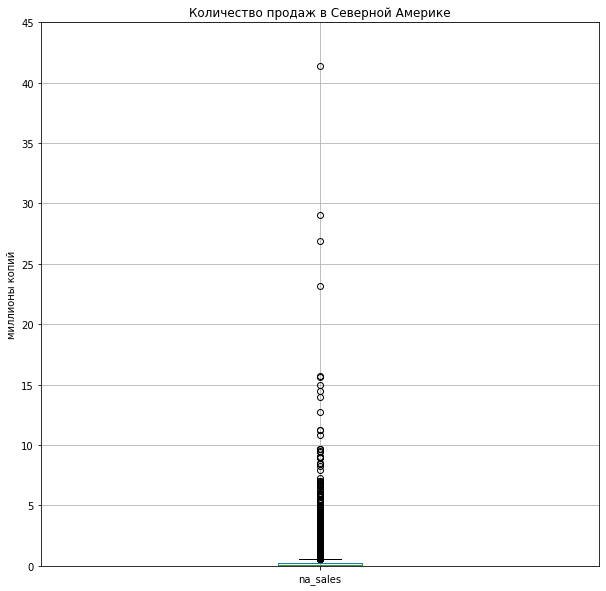

name platform  year_of_release     genre  na_sales  eu_sales  \
0         Wii Sports      Wii             2006    Sports     41.36     28.96   
1  Super Mario Bros.      NES             1985  Platform     29.08      3.58   
9          Duck Hunt      NES             1984   Shooter     26.93      0.63   
5             Tetris       GB             1989    Puzzle     23.20      2.26   
2     Mario Kart Wii      Wii             2008    Racing     15.68     12.76   

   jp_sales  other_sales  critic_score user_score rating  
0      3.77         8.45          76.0          8      E  
1      6.81         0.77           NaN        NaN    NaN  
9      0.28         0.47           NaN        NaN    NaN  
5      4.22         0.58           NaN        NaN    NaN  
2      3.79         3.29          82.0        8.3      E

In [15]:
#изучаю прдажи в северной Америке

print('Всего наименований игр продано:', len(data['na_sales'].unique()))
print('Всего пропущно значений:', data['na_sales'].isna().sum())
print('Продано игр в млн.:', data['na_sales'].sum())

data.boxplot(column='na_sales', figsize=(10, 10))
plt.title('Количество продаж в Северной Америке')
plt.ylim(0, 45)
plt.ylabel('миллионы копий')
plt.show()

#топ-5 для Северной Америки
data.sort_values(by=['na_sales'], ascending=False).head(5)

In [16]:
#привожу к типу float
data['na_sales'] = data['na_sales'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Есть 4 выброса свыше 20 миллионов копий продажи для каждой игры

Самая популярная игра в Северной Америке Wii Sports. 
<br>Если эти игры имеют продажи свыше 20 миллионов копий каждой в СА. Предполагаю, что оценки и рейтинг отсутствует из-за выхода игр в 80х годах, когда играм оценки не присваивали ещё.  

### Столбец ['eu_sales']

Всего наименований игр продано: 307
Всего пропущно значений: 0
Продано игр в млн.: 2399.6800000000003


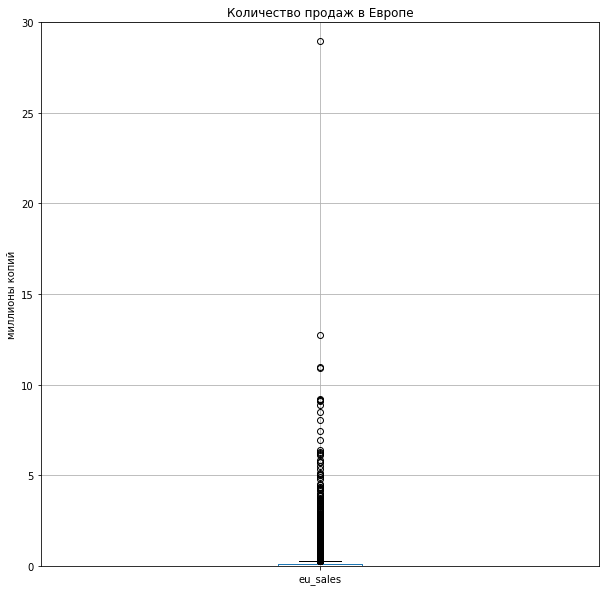

name platform  year_of_release  \
0                                     Wii Sports      Wii             2006   
2                                 Mario Kart Wii      Wii             2008   
10                                    Nintendogs       DS             2005   
3                              Wii Sports Resort      Wii             2009   
19  Brain Age: Train Your Brain in Minutes a Day       DS             2005   

         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
0       Sports     41.36     28.96      3.77         8.45          76.0   
2       Racing     15.68     12.76      3.79         3.29          82.0   
10  Simulation      9.05     10.95      1.93         2.74           NaN   
3       Sports     15.61     10.93      3.28         2.95          80.0   
19        Misc      4.74      9.20      4.16         2.04          77.0   

   user_score rating  
0           8      E  
2         8.3      E  
10        NaN    NaN  
3           8      E  
19        7.9      E

In [17]:
#изучаю прдажи в Европе
print('Всего наименований игр продано:', len(data['eu_sales'].unique()))
print('Всего пропущно значений:', data['eu_sales'].isna().sum())
print('Продано игр в млн.:', data['eu_sales'].sum())

data.boxplot(column='eu_sales', figsize=(10, 10))
plt.title('Количество продаж в Европе')
plt.ylim(0, 30)
plt.ylabel('миллионы копий')
plt.show()

#топ-5 для Европы
data.sort_values(by=['eu_sales'], ascending=False).head(5)

In [18]:
#привожу к типу float
data['eu_sales'] = data['eu_sales'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Самая популярная игра в Европе также Wii Sports

### Столбец ['jp_sales']

Всего наименований игр продано: 244
Всего пропущно значений: 0
Продано игр в млн.: 1290.6399999999999


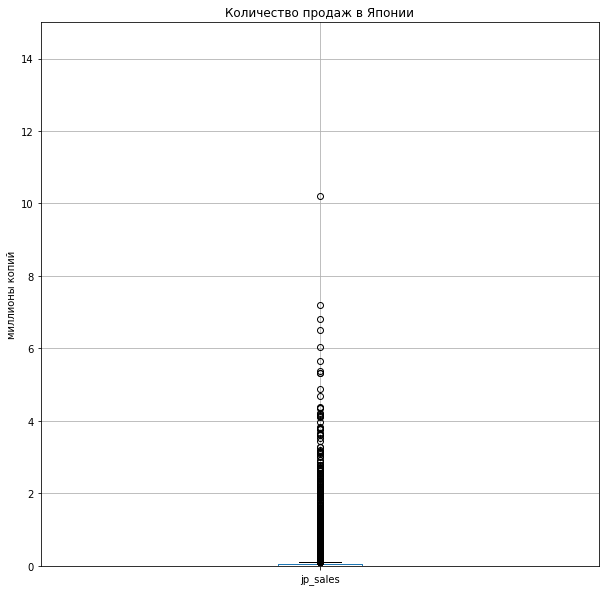

name platform  year_of_release         genre  \
4        Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
12    Pokemon Gold/Pokemon Silver       GB             1999  Role-Playing   
1               Super Mario Bros.      NES             1985      Platform   
6           New Super Mario Bros.       DS             2006      Platform   
20  Pokemon Diamond/Pokemon Pearl       DS             2006  Role-Playing   

    na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  
4      11.27      8.89     10.22         1.00           NaN        NaN    NaN  
12      9.00      6.18      7.20         0.71           NaN        NaN    NaN  
1      29.08      3.58      6.81         0.77           NaN        NaN    NaN  
6      11.28      9.14      6.50         2.88          89.0        8.5      E  
20      6.38      4.46      6.04         1.36           NaN        NaN    NaN

In [19]:
#изучаю прдажи в Японии
print('Всего наименований игр продано:', len(data['jp_sales'].unique()))
print('Всего пропущно значений:', data['jp_sales'].isna().sum())
print('Продано игр в млн.:', data['jp_sales'].sum())

data.boxplot(column='jp_sales', figsize=(10, 10))
plt.title('Количество продаж в Японии')
plt.ylim(0, 15)
plt.ylabel('миллионы копий')
plt.show()

#топ-5 игр для Японии
data.sort_values(by=['jp_sales'], ascending=False).head(5)

In [20]:
#привожу к типу float
data['jp_sales'] = data['jp_sales'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


В Японии популярны более старые игры.  

### Столбец ['other_sales']

Всего наименований игр продано: 155
Всего пропущно значений: 0
Продано игр в млн.: 782.63


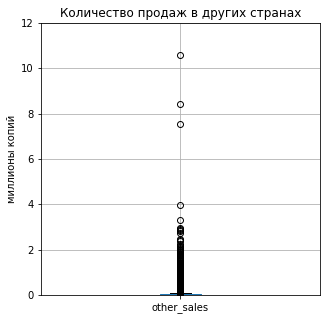

name platform  year_of_release   genre  na_sales  \
17  Grand Theft Auto: San Andreas      PS2             2004  Action      9.43   
0                      Wii Sports      Wii             2006  Sports     41.36   
48                 Gran Turismo 4      PS2             2004  Racing      3.01   
16             Grand Theft Auto V      PS3             2013  Action      7.02   
2                  Mario Kart Wii      Wii             2008  Racing     15.68   

    eu_sales  jp_sales  other_sales  critic_score user_score rating  
17      0.40      0.41        10.57          95.0          9      M  
0      28.96      3.77         8.45          76.0          8      E  
48      0.01      1.10         7.53          89.0        8.5      E  
16      9.09      0.98         3.96          97.0        8.2      M  
2      12.76      3.79         3.29          82.0        8.3      E

In [21]:
#изучаю прдажи в других странах
print('Всего наименований игр продано:', len(data['other_sales'].unique()))
print('Всего пропущно значений:', data['other_sales'].isna().sum())
print('Продано игр в млн.:', data['other_sales'].sum())

data.boxplot(column='other_sales', figsize=(5, 5))
plt.title('Количество продаж в других странах')
plt.ylim(0, 12)
plt.ylabel('миллионы копий')
plt.show()

#топ-5 игр для других стран
data.sort_values(by=['other_sales'], ascending=False).head(5)

In [22]:
#привожу к типу float
data['other_sales'] = data['other_sales'].astype(float)

В других странах популярна GTA Sun Andreas

#### Общий вывод по столбцам о продажах в разных регионах 
Пропущенных значений нет, выбросы не похожи на аномалии.
<br>Самая популярная игра в Северной Америке Wii Sports.
<br>Самая популярная игра в Европе Wii Sports.
<br>Самая популярная игра в Японии Pokemon Red/Pokemon Blue.
<br>Самая популярная игра в других странах Grand Theft Auto: San Andreas

### Столбец ['critic_score']

In [23]:
#изучаю оценки критиков
print('Всего уникальных оценок критиков:', len(data['critic_score'].unique()))
print('Всего пропущно значений:', data['critic_score'].isna().sum())
print('Процент пропущенных значений =', data['critic_score'].isna().mean()*100)
was = data['critic_score'].isna().sum()

Всего уникальных оценок критиков: 82
Всего пропущно значений: 8461
Процент пропущенных значений = 51.453417659936754


Большое количество пропущенных значений. Можно восстановить медианное значение для каждого названия игр. 

In [24]:
#восстанавливаю пропущенные значения где это возможно 
data['critic_score'] = data['critic_score'].fillna(data.groupby(['name'])['critic_score'].transform('median'))
print('Всего пропущно значений:', data['critic_score'].isna().sum())

#подсчитываю разницу
now = data['critic_score'].isna().sum()
print('Разница между было-стало составляет:', was-now)
print('Процент пропущенных значений =', data['critic_score'].isna().mean()*100)

Всего пропущно значений: 7522
Разница между было-стало составляет: 939
Процент пропущенных значений = 45.743128192653856


Восстановила 5% данных

### Столбец ['user_score']

In [25]:
#изучаю колонку оценки пользователей
print('Всего уникальных оценок:', len(data['user_score'].unique()))
print('Всего пропущно значений:', data['user_score'].isna().sum())
print('Процент пропущенных значений =', data['user_score'].isna().mean()*100)
data['user_score'].sort_values().unique()

Всего уникальных оценок: 97
Всего пропущно значений: 6605
Процент пропущенных значений = 40.166626125030405


array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

В данных встречается аббревиатура "tbd" - это обозначает "to be determind" (в переводе с англ. "подлежит к определению"). Предполагаю, что это значит неопределённость в оценке пользователей. С точки зрения значения, это может быть эквивалентом NaN. 

In [26]:
#смотрю в скольких строчках встречается tbd
print('"tbd" встречается в', data.loc[data['user_score']=='tbd', 'user_score'].count(), 'строчках')

"tbd" встречается в 2376 строчках


In [27]:
#превращаю tbd в NaN
data['user_score'] =  data['user_score'].replace('tbd', np.nan).astype(float)
print('Процент пропущенных значений =', data['user_score'].isna().mean()*100)

Процент пропущенных значений = 54.61566528825104


В ходе работы заменила tbd на NaN, чтобы привести к единому типу данных float

### Столбец ['rating']

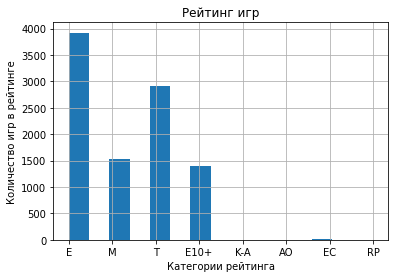

Всего уникальных годов выпуска игр: 9
Всего пропущно значений: 6676
Процент пропущенных значений = 40.59839455120409


E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

In [28]:
#изучаю колонку рейтинга

data['rating'].hist(bins=15)
plt.title('Рейтинг игр')
plt.xlabel('Категории рейтинга')
plt.ylabel('Количество игр в рейтинге')
plt.show()

print('Всего уникальных годов выпуска игр:', len(data['rating'].unique()))
print('Всего пропущно значений:', data['rating'].isna().sum())
print('Процент пропущенных значений =', data['rating'].isna().mean()*100)

data['rating'].value_counts()

Имеется много пропущенных значений. Имеются устаревшие данные для рейтинга K-A (kids-to-adult - от детей до взрослых), с 1998 года изменён на E (everyone - для всех). Имеются игры с рейтингом EC (early childhood - игры для детей раннего возраста), AO (adult only 18+ - игры для взрослых), RP (Rating Pending— рейтинг ожидается). Вызывает сомнения, что из 11 тысяч игр, только 1, 3 или 8 имеют определенные рейтинги. Надо посмотреть на игры и проверить на неявные дубликаты.

In [29]:
data.loc[data['rating']=='EC']

name platform  \
4297                         Nickelodeon Team Umizoomi       DS   
5034          Sesame Street: Elmo's A-to-Zoo Adventure      Wii   
6046         Sesame Street: Cookie's Counting Carnival      Wii   
6764   Dora the Explorer: Journey to the Purple Planet      PS2   
7586           Ni Hao, Kai-lan: New Year's Celebration       DS   
9960   Dora the Explorer: Journey to the Purple Planet       GC   
13065        Sesame Street: Cookie's Counting Carnival       PC   
13455         Sesame Street: Elmo's A-to-Zoo Adventure       PC   

       year_of_release      genre  na_sales  eu_sales  jp_sales  other_sales  \
4297              2011     Action      0.42      0.00       0.0         0.03   
5034              2010       Misc      0.35      0.00       0.0         0.02   
6046              2010       Misc      0.27      0.00       0.0         0.02   
6764              2005  Adventure      0.12      0.09       0.0         0.03   
7586              2009       Misc      0.19      0.00       0.0         0.01   
9960              2005  Adventure      0.09      0.02       0.0         0.00   
13065             2010       Misc      0.05      0.00       0.0         0.00   
13455             2010       Misc      0.04      0.00       0.0         0.00   

       critic_score  user_score rating  
4297            NaN         NaN     EC  
5034            NaN         NaN     EC  
6046            NaN         NaN     EC  
6764            NaN         7.0     EC  
7586            NaN         NaN     EC  
9960            NaN         NaN     EC  
13065           NaN         NaN     EC  
13455           NaN         NaN     EC

In [30]:
data.loc[data['rating']=='K-A']

name platform  year_of_release     genre  na_sales  \
656        Theme Hospital       PC             1997  Strategy      2.30   
903    PaRappa The Rapper       PS             1996      Misc      0.26   
16681             Worms 2       PC             1997  Strategy      0.00   

       eu_sales  jp_sales  other_sales  critic_score  user_score rating  
656        0.10      0.00         0.00           NaN         9.0    K-A  
903        0.16      1.46         0.03          92.0         7.4    K-A  
16681      0.01      0.00         0.00           NaN         8.1    K-A

In [31]:
data.loc[data['name']=='Grand Theft Auto: San Andreas']

name platform  year_of_release   genre  \
17     Grand Theft Auto: San Andreas      PS2             2004  Action   
875    Grand Theft Auto: San Andreas       XB             2005  Action   
2115   Grand Theft Auto: San Andreas       PC             2005  Action   
10311  Grand Theft Auto: San Andreas     X360             2008  Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
17         9.43      0.40      0.41        10.57          95.0         9.0   
875        1.26      0.61      0.00         0.09          93.0         8.6   
2115       0.00      0.93      0.00         0.04          93.0         8.9   
10311      0.08      0.02      0.00         0.01          93.0         7.5   

      rating  
17         M  
875       AO  
2115       M  
10311      M

Так как GTA является ведущей игрой по продажам в других регионах, имеет смысл для платформы x-box исправить рейтинг на M

In [32]:
data.loc[data['rating']=='RP']

name platform  year_of_release     genre  na_sales  \
14270  Supreme Ruler: Cold War       PC             2011  Strategy       0.0   

       eu_sales  jp_sales  other_sales  critic_score  user_score rating  
14270      0.03       0.0         0.01          63.0         6.8     RP

В данных с рейтингами ничего изменять не буду, но для дальнейшего анализа добавлю дополнительный столбец с новыми категориями, по которым и буду проводить исследовательский анализ. 

In [33]:
#создаю функцию для простановки рейтинга цифрами
def categorize_rating(rating):
    try:
        if rating == 'E' or rating == 'K-A' or rating == 'EC':
            return 'Для всех возрастных категорий'
        elif rating == 'E10+' or rating == 'RP':
            return 'Для детей старше 10 лет'
        elif rating == 'T':
            return 'Для детей старше 13 лет'
        elif rating == 'M' or rating == 'AO':
            return '17+'
    except:
        pass
    
#создаю дополнительный столбец с категоризацией рейтинга в цифрах    
data['total_rating_category'] = data['rating'].apply(categorize_rating)

In [34]:
#заполняю пропущенные значения в рейтинге
data['total_rating_category'] = data['total_rating_category'].fillna('Пропущены данные')
print('Пропущенные значения встречаются в', data['total_rating_category'].isna().sum(), 'строчках')


Пропущенные значения встречаются в 0 строчках


In [35]:
data.groupby(['total_rating_category']).sum()

year_of_release  na_sales  eu_sales  jp_sales  \
total_rating_category                                                          
17+                                    3087537    744.15    480.61     63.58   
Для всех возрастных категорий          7890718   1278.33    704.25    199.42   
Для детей старше 10 лет                2801094    345.50    183.38     40.20   
Для детей старше 13 лет                5830709    747.60    421.79    150.70   
Пропущены данные                      13384602   1225.84    609.65    836.74   

                               other_sales  critic_score  user_score  
total_rating_category                                                 
17+                                 176.15      107857.5     10697.0  
Для всех возрастных категорий       231.68      205553.0     16494.2  
Для детей старше 10 лет              71.94       83353.5      7042.1  
Для детей старше 13 лет             152.99      187328.5     18368.8  
Пропущены данные                    149.87       29814.5       581.7

In [36]:
#определила игры с некорректно проставленным рейтингом, с помощью сайта рейтинга восстановила тот, что должен быть
data.loc[data['name']=='Ridge Racer'] = data.loc[data['name']=='Ridge Racer'].replace(1.5, 1)
data.loc[data['name']=='Legend of Kay'] = data.loc[data['name']=='Legend of Kay'].replace(1.5, 1)
data.loc[data['name']=='Monster Jam: Maximum Destruction'] = data.loc[data['name']=='Monster Jam: Maximum Destruction'].replace(2.5, 4)
data.loc[data['name']=="Tony Hawk's Pro Skater 2"] = data.loc[data['name']=="Tony Hawk's Pro Skater 2"].replace(2.5, 1)
data.loc[data['name']=="Doom"] = data.loc[data['name']=="Doom"].replace(3.5, 3)

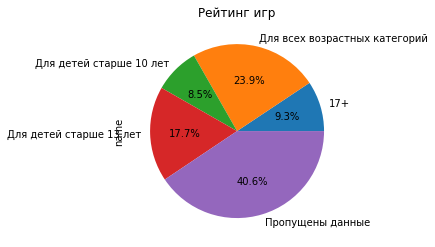

In [37]:
#проверяю как получилось
data.pivot_table(index='total_rating_category', values = 'name', aggfunc='count').plot(kind='pie', subplots=True, autopct='%1.1f%%', legend=False)
plt.title('Рейтинг игр')
plt.show()

### ИТОГ

In [38]:
#проверяю на пропущенные значения было стало
print('БЫЛО', '\n', nans)

БЫЛО 
 Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [39]:
print('СТАЛО', '\n', data.isna().sum())

СТАЛО 
 name                        0
platform                    0
year_of_release             0
genre                       0
na_sales                    0
eu_sales                    0
jp_sales                    0
other_sales                 0
critic_score             7522
user_score               8981
rating                   6676
total_rating_category       0
dtype: int64


In [40]:
#проверяю изменения по таблице
print('БЫЛО')
descr

БЫЛО


Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

### ВЫВОД по предобработке данных
<br>• Исправлен регистр наименований столбцов предоставленных данных;
<br>• исключены данные с пропущенными значениями в столбцах ['name'] и ['genre'];
<br>• исключены данные с пропущенными значениями в столбце ['year_of_release'], т.к. они составляли менее 5% данных и не влияют на исследовательский анализ;
<br>• столбцы ['na_sales '], ['eu_sales'], ['jp_sales'], ['other_sales'] не содержали в себе явных некорректных данных;
<br>• частично восстановленны пропущенные значения в столбце ['critic_score']с критической оценкой, порядка 12%;
<br>• в столбце ['user_score'] заменены значения TBD (требует определения) на NAN (пропущенные значения), так как невозможно восстановить оценку пользователей, в связи с этим увеличился процент пропущенных значений;
<br>• частично восстановлены пропущенные значения в столбце ['rating'], восстановление составило менее 1%, однако создан дополнительно столбец с исследовательским рейтингом, объединив в себе часть значений для проведения исследовательского анализа.

## 3. Исследовательский анализ

### 3.1. Cколько игр выпускалось в разные годы

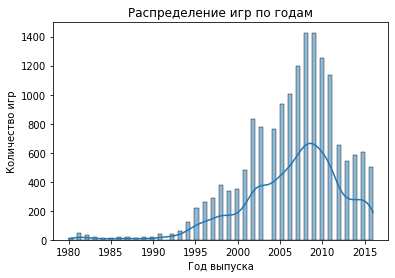

In [42]:
# построим график распределения кол-ва выпущенных игр по годам
import seaborn as sns
sns.histplot(data['year_of_release'], kde=True, bins=75)
plt.title('Распределение игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

#### Вывод по 3.1.
<br>Игры выпускались с 1980 года по настоящее время. 
<br>Заметный рост количества выпускаемых игр начинается с 1993 года, и достигает своего пика в 2007-2008 годах, далее идёт спад до уровня 2001 года. 
<br>К рассмотрению имеет смысл принять данные не ранее 2009 года, так как с этого момента начинается спад, а значит активные пользователи возможно повзрослели, стали более разборчивыми в своих предпочтениях и более категорично подходят к выбору игры.

### 3.2. Как менялись продажи по платформам

<br>Необходимо изучить платформы с наибольшими суммарными продажами.
<br>Построить распределение по годам. 
<br>За какой характерный срок появляются новые и исчезают старые платформы?

In [43]:
#Для определения итоговых продаж игр по платформам необходимо создать дополнительный столбец ['total_sales']
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

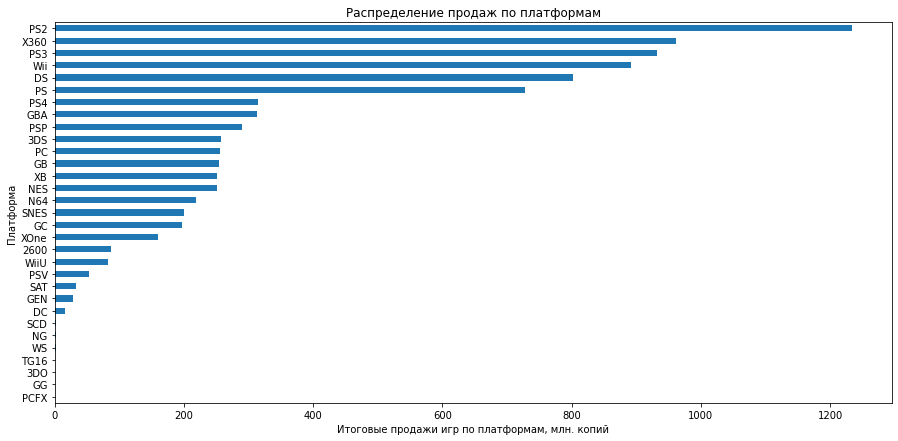

In [77]:
#строю гистограмму по сводной таблице суммарных продаж для каждой платформы
pivot = data.pivot_table(
    index='platform', 
    values='total_sales', 
    aggfunc='sum').sort_values('total_sales').plot(kind='barh', figsize=(15, 7), legend=False)
plt.title('Распределение продаж по платформам')
#plt.bar_label(pivot.containers[0]) - у меня на компютере этот атрибут работает. Он добавляет значения к столбцам, очень наглядно. 
plt.xlabel('Итоговые продажи игр по платформам, млн. копий')
plt.ylabel('Платформа')
plt.show()

Из графика видно, что самое большое количество игр выпускается для PS2 и X360. Последние четыре платформы имеют количество продаж игр за всё время не более 160 тысяч. Это очень мало, по сравнению с PS2, например, и говорит об узкой специфике платформы. 

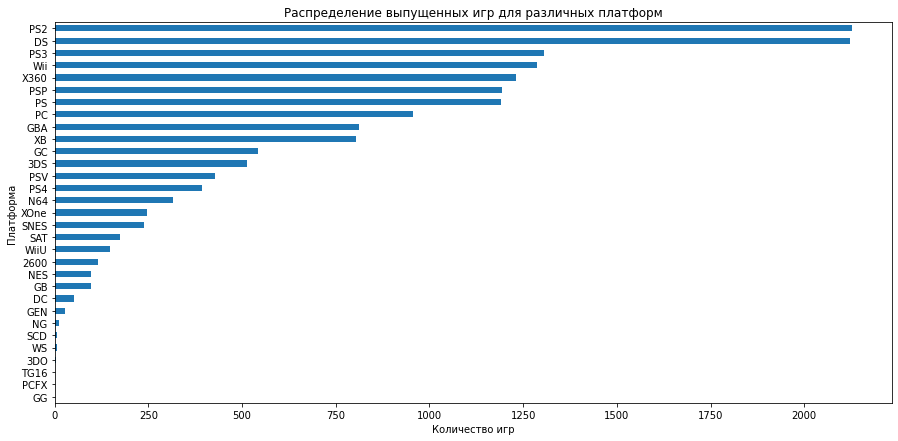

In [45]:
#сколько игр для каждой платформы
pivot2 = data.pivot_table(
    index='platform', 
    values='year_of_release', 
    aggfunc='count').sort_values('year_of_release').plot(kind='barh', figsize=(15, 7), legend=False)
plt.title('Распределение выпущенных игр для различных платформ')
plt.xlabel('Количество игр')
plt.ylabel('Платформа')
#plt.bar_label(pivot2.containers[0]) - на моей локальной версии этот атрибут поддерживается.
plt.show()

Так же график распределения выпущенных игр показывает, что в топ-10 платформ лидирующее место занимает PS2 с количеством игр 2127. Последние 4 платформы соответствуют 4 платформам из графика рапределения продаж и подтверждают предположение, что платформы очень узкоспециализированы. Например, для платформы GG была выпущена всего 1 игра и продана по миру всего 40 тысяч копий.

In [46]:
#изучаю срок жизни каждой платформы

#строю вспомогательную таблицу для диаграммы Ганта
mins = data[['platform', 'year_of_release']].groupby(['platform']).min()
maxs = data[['platform', 'year_of_release']].groupby(['platform']).max()
mins['end'] = maxs['year_of_release']
mins.reset_index(level=0, inplace=True)
mins.rename(columns = {'platform':'Task', 'year_of_release':'Start', 'end':'Finish'}, inplace = True)  
mins['delta'] = mins['Finish']-mins['Start']
mins = mins.sort_values('delta')
mins

#строю саму диаграмму Ганта
import plotly.figure_factory as ff
fig = ff.create_gantt(mins)
fig.show()

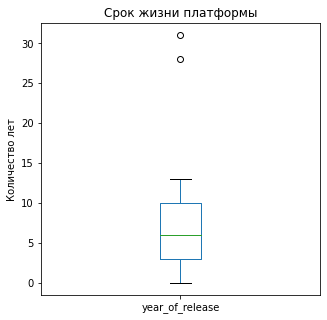

year_of_release
count        31.000000
mean          7.612903
std           6.998464
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          31.000000

In [47]:
#изучаю срок жизни платфрмы
#строю вспомогательную таблицу для отображения данных на диаграмме размаха
platform_life = data[['platform', 'year_of_release']].groupby(['platform']).max() - data[['platform', 'year_of_release']].groupby(['platform']).min()
platform_life.sort_values('platform', ascending=False).plot(kind='box', figsize=(5, 5))
plt.title('Срок жизни платформы')
plt.ylabel('Количество лет')
plt.show()
platform_life.describe()

#### Вывод по 3.2.
<br>Из диаграммы Ганта видно, что самая долгоиграющая платформа это PC - игры для компьютеров выпускаются с 1985 года по текущий момент. 
<br>Однако для второй по жизни платформы DS выпуск игр начался в 1985 году, а прекратился в 2013 году. Значит пример PС больше исключение, и имеет смысл ориентроваться на медианное значение жизни игровой платформы.
<br>Из диаграммы размаха видно, что медианный срок жизни платфоры порядка 6 лет.
<br>Необходимо актуализировать таблицу с самыми поддерживаемыми платформами и для них уже проводить дальнейший исследовательский анализ. Подходящий диапазон лет с 2013 года по текущий. 


### 3.3. Данные за соответствующий актуальный период

In [48]:
#создаю актуальный датафрейм
top_data = data.query('year_of_release >= 2013')
top_data

name platform  year_of_release         genre  \
16                Grand Theft Auto V      PS3             2013        Action   
23                Grand Theft Auto V     X360             2013        Action   
31         Call of Duty: Black Ops 3      PS4             2015       Shooter   
33               Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
42                Grand Theft Auto V      PS4             2014        Action   
...                              ...      ...              ...           ...   
16703               Strawberry Nauts      PSV             2016     Adventure   
16707               Aiyoku no Eustia      PSV             2014          Misc   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16         7.02      9.09      0.98         3.96          97.0         8.2   
23         9.66      5.14      0.06         1.41          97.0         8.1   
31         6.03      5.86      0.36         2.38           NaN         NaN   
33         5.28      4.19      4.35         0.78           NaN         NaN   
42         3.96      6.31      0.38         1.97          97.0         8.3   
...         ...       ...       ...          ...           ...         ...   
16703      0.00      0.00      0.01         0.00           NaN         NaN   
16707      0.00      0.00      0.01         0.00           NaN         NaN   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

      rating total_rating_category  total_sales  
16         M                   17+        21.05  
23         M                   17+        16.27  
31       NaN      Пропущены данные        14.63  
33       NaN      Пропущены данные        14.60  
42         M                   17+        12.62  
...      ...                   ...          ...  
16703    NaN      Пропущены данные         0.01  
16707    NaN      Пропущены данные         0.01  
16710    NaN      Пропущены данные         0.01  
16712    NaN      Пропущены данные         0.01  
16714    NaN      Пропущены данные         0.01  

[2233 rows x 13 columns]

In [49]:
top_data.describe()

year_of_release     na_sales     eu_sales     jp_sales  other_sales  \
count      2233.000000  2233.000000  2233.000000  2233.000000  2233.000000   
mean       2014.477385     0.196019     0.175652     0.063045     0.053726   
std           1.089439     0.547730     0.512451     0.233997     0.165693   
min        2013.000000     0.000000     0.000000     0.000000     0.000000   
25%        2014.000000     0.000000     0.000000     0.000000     0.000000   
50%        2014.000000     0.020000     0.030000     0.010000     0.010000   
75%        2015.000000     0.150000     0.130000     0.050000     0.040000   
max        2016.000000     9.660000     9.090000     4.350000     3.960000   

       critic_score   user_score  total_sales  
count   1321.000000  1192.000000  2233.000000  
mean      71.941711     6.584564     0.488442  
std       13.410930     1.610413     1.235226  
min       13.000000     0.200000     0.010000  
25%       66.000000     5.800000     0.030000  
50%       74.000000     7.000000     0.110000  
75%       81.000000     7.800000     0.400000  
max       97.000000     9.300000    21.050000

#### Вывод по 3.3.
Создали новый датафрейм с играми с 2013 года. 
Срез уменьшился с 16444 до 2233. Остальные значения не участвуют в исследовательском анализе в виду их неактуальности.
Исходя из описания, основная масса игр вышла в 2014 году

### 3.4. Динамика

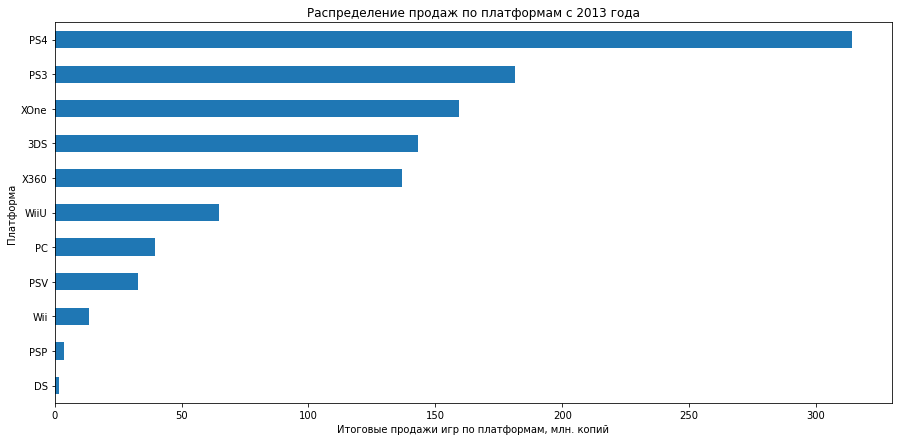

In [50]:
#распределение продаж по актуальным платформам
pivot4 = top_data.pivot_table(
    index='platform', 
    values='total_sales', 
    aggfunc='sum').sort_values('total_sales').plot(kind='barh', figsize=(15, 7), legend=False)
plt.title('Распределение продаж по платформам с 2013 года')
#plt.bar_label(pivot4.containers[0]) - на локальной версии этот атрибут поддерживается
plt.xlabel('Итоговые продажи игр по платформам, млн. копий')
plt.ylabel('Платформа')
plt.show()

В топ-3 входит PS4, PS3, XOne. Это максимально популярные платформы, для них больше всего игр покупают. 

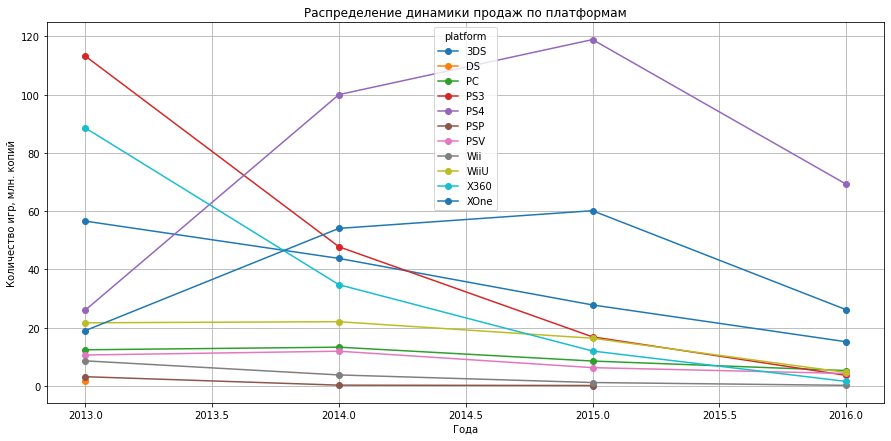

In [51]:
#определение динамики продаж игр 
top_data.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum').plot(style='-o', figsize = (15,7), grid=True)
plt.title('Распределение динамики продаж по платформам')
plt.xlabel('Года')
plt.ylabel('Количество игр, млн. копий')
plt.show()

Из графика распределния динамики продаж по платформам, что с каждым годом игр продаётся всё меньше. Набирающие популярность игровые платформа PS4 и XOne также пошли на спад. 
Так же в данные попали PSP, которая прекратила продажи игр в 2015 году, и DS, которая прекратила продажи игр в 2013 году. Из исследования их необходимо исключить, как уже неактуальные.
<br><br>3DS - относительно свежая платформа, выпущенная в 2011 году. Продажи в 2016 году упали до уровня 2013 года. 
<br>DS - Посление игры продавались в 2013 году. Неактуальна, исключить из дальнейшего исследования.
<br>PC - Игры для портативного компьютера продолжают относительно ровно продаваться. 
<br>PS3 - Продажи игр в 2016 стремится к нулю. 
<br>PS4 - Продажи в 2016 году упали до уровня 2013 года, предполагаю, что связано это с тем, что данная платформа была выпущена в 2013 году и потребовала переписывания под себя уже имеющихся игр, этим обусловлен рост и дальнейший спад. 
<br>PSP - Последние игры продавались в году. Уже не актуальна. Исключить из дальнейшего исследования.
<br>PSV - Игры для PSV продолжают относительно ровно продаваться.
<br>Wii - в 2016 году для Wii продано меньше миллиона копий игр. Не актуально. 
<br>WiiU - у WiiU чуть больший спад, но игры продолжают продаваться. 
<br>X360 - Быстрый спад продаж, в 2016 продажи стремятся к 0. Имеет смысл исключить из подборки. 
<br>XOne - спад аналогичен PS4, однако игры продолжают продаваться миллионами копий. 
<br><br> Необходимо подтвердить предположение о неактуальности платформ DS, PS3, Wii и X360 динамикой выпущенных игр. 

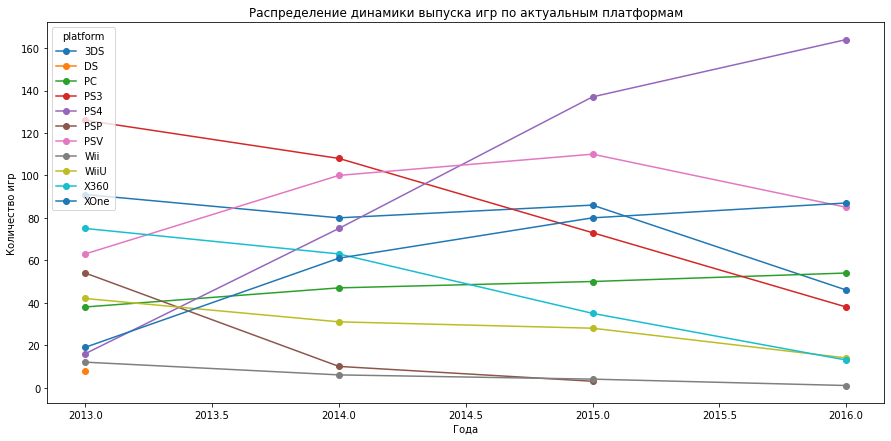

In [52]:
#определение динамики выпуска новых игр для платформ
top_data.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='name', 
    aggfunc='count').plot(style='-o', figsize = (15,7))
plt.title('Распределение динамики выпуска игр по актуальным платформам')
plt.xlabel('Года')
plt.ylabel('Количество игр')
plt.show()

In [53]:
#строю таблицу для топ5 платформ по выпуску новых игр в 2016 году
top_data.pivot_table(    
    index='platform', 
    columns='year_of_release', 
    values='name', 
    aggfunc='count').sort_values(by=2016, ascending=False).head()

year_of_release  2013   2014   2015   2016
platform                                  
PS4              16.0   75.0  137.0  164.0
XOne             19.0   61.0   80.0   87.0
PSV              63.0  100.0  110.0   85.0
PC               38.0   47.0   50.0   54.0
3DS              91.0   80.0   86.0   46.0

#### Вывод по 3.4. 
Из распределения динамики выпуска новых игр видно, что для PSP и DS не только прекраитились продажи, но и прекратился выпуск новых игр. Это говорит о том, что для платформы закончился срок жизни. 
Набирают популярность PS4, XOne, новые игры для компьютеров (PC) продолжают выпускаться, ровный спад у 3DS, говорит о том, что платформа ещё актуальна, но уже заканчивает свой срок. 
Активный спад у PS3, X360, WiiU. У Wii продаж практически не было как и выпуска новых игр. 
<br><br> Таким образом определились 5 потенциально актуальных платформ для прогноза на 2017 год: PS4, XOne, PSV, PC, 3DS.

### 3.5. Глобальные продажи игр в разбивке по платформам

In [54]:
#Актуализирую таблицу по топ-5 платформам
top5 = top_data.query('platform == ("PS4", "XOne", "PSV", "PC", "3DS")')
top5.head()

name platform  year_of_release  \
31                  Call of Duty: Black Ops 3      PS4             2015   
33                        Pokemon X/Pokemon Y      3DS             2013   
42                         Grand Theft Auto V      PS4             2014   
47  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
77                                    FIFA 16      PS4             2015   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
31       Shooter      6.03      5.86      0.36         2.38           NaN   
33  Role-Playing      5.28      4.19      4.35         0.78           NaN   
42        Action      3.96      6.31      0.38         1.97          97.0   
47  Role-Playing      4.35      3.49      3.10         0.74           NaN   
77        Sports      1.12      6.12      0.06         1.28          82.0   

    user_score rating          total_rating_category  total_sales  
31         NaN    NaN               Пропущены данные        14.63  
33         NaN    NaN               Пропущены данные        14.60  
42         8.3      M                            17+        12.62  
47         NaN    NaN               Пропущены данные        11.68  
77         4.3      E  Для всех возрастных категорий         8.58

In [55]:
top5.describe()

year_of_release     na_sales     eu_sales     jp_sales  other_sales  \
count      1489.000000  1489.000000  1489.000000  1489.000000  1489.000000   
mean       2014.744124     0.172069     0.171323     0.068972     0.050450   
std           1.040029     0.475621     0.497359     0.272615     0.149002   
min        2013.000000     0.000000     0.000000     0.000000     0.000000   
25%        2014.000000     0.000000     0.000000     0.000000     0.000000   
50%        2015.000000     0.010000     0.020000     0.010000     0.010000   
75%        2016.000000     0.110000     0.120000     0.050000     0.030000   
max        2016.000000     6.030000     6.310000     4.350000     2.380000   

       critic_score  user_score  total_sales  
count    855.000000  773.000000  1489.000000  
mean      72.701754    6.722251     0.462814  
std       12.536688    1.537543     1.159209  
min       19.000000    1.400000     0.010000  
25%       67.000000    6.000000     0.030000  
50%       74.500000    7.100000     0.100000  
75%       81.000000    7.800000     0.340000  
max       97.000000    9.300000    14.630000

Ещё больше уточнив таблицу, видно, что медиана выпуска игр проходит по 2015 году, продажи лидируют в Северной Америке и Европе.

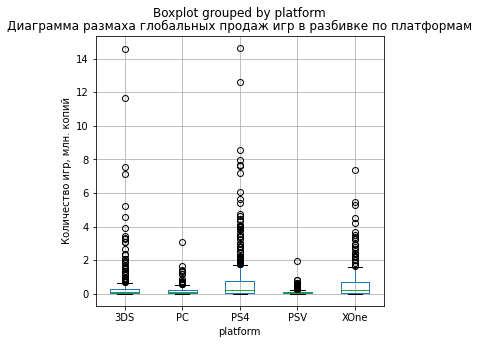

In [56]:
#Строю диаграмму размаха по глобальным продажам игр в разбивке по платформам
top5.boxplot(column='total_sales', by='platform', figsize=(5, 5))
plt.title('Диаграмма размаха глобальных продаж игр в разбивке по платформам')
plt.ylabel('Количество игр, млн. копий')
plt.show()

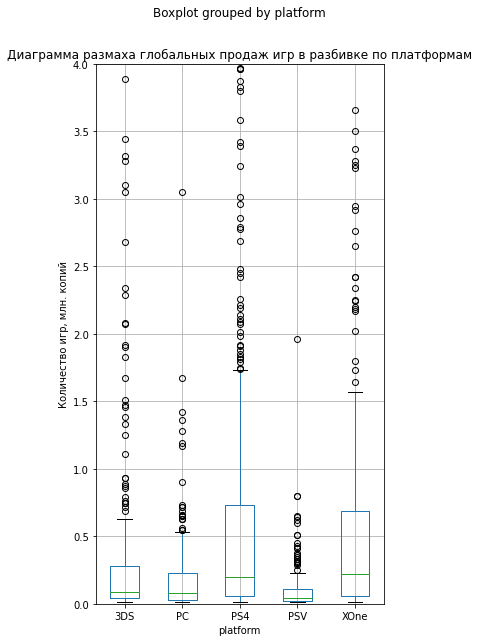

In [57]:
#Приближаю диаграмму установив лимит в 4млн копий
top5.boxplot(column='total_sales', by='platform', figsize=(5, 10))
plt.title('Диаграмма размаха глобальных продаж игр в разбивке по платформам')
plt.ylabel('Количество игр, млн. копий')
plt.ylim(0, 4)
plt.show()

#### Вывод 3.5.
На графиках видно, что есть много выбросов в разы больше, чем медианы продаж игр. 
Предполагаю, что связано это с играми-хитами, которые обеспечивают основные продажи и соответствующие выбросы. 
<br>Также видно из таблицы, что медиана выпуска новых игр приходится на 2015 год, а основные продажи в Северной Америке и Европе.

### 3.6. Корреляция между отзывами и продажами для самой популярной платформы

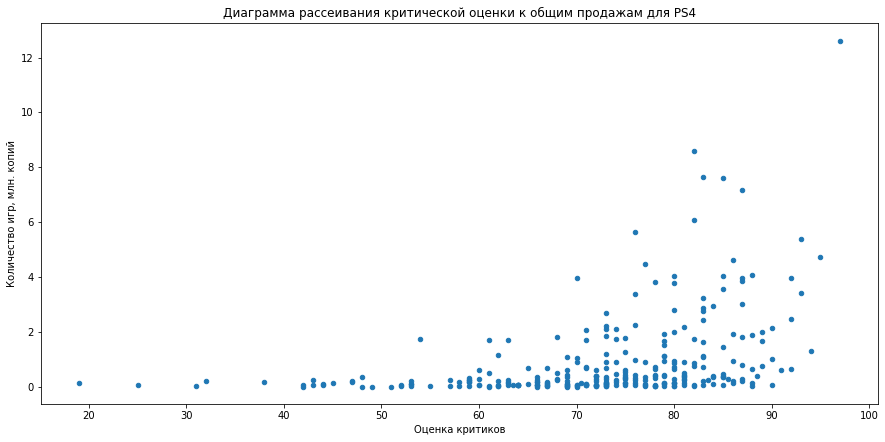

Коэффицент корреляции: 0.39060159731130356


In [58]:
#определяю корреляуцию между отзывами и продажами для самой популярной платформы PS4
first = top5.query('platform == "PS4"')
first.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(15, 7))
plt.title('Диаграмма рассеивания критической оценки к общим продажам для PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество игр, млн. копий')
plt.show()
print('Коэффицент корреляции:',first['critic_score'].corr(first['total_sales']))

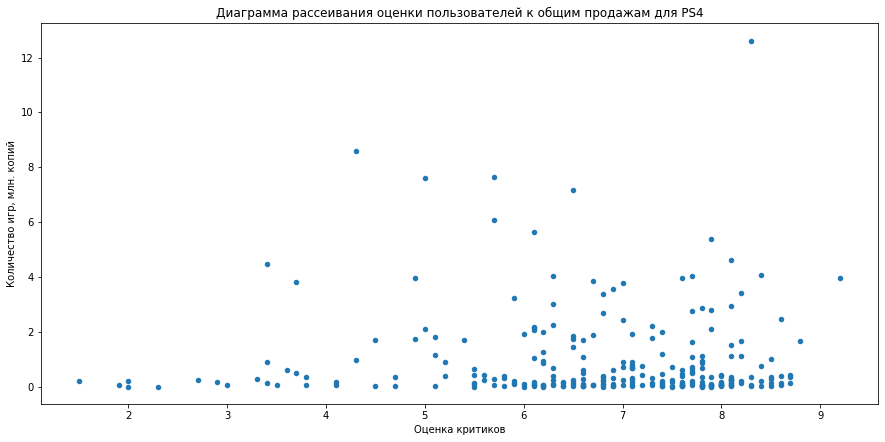

Коэффицент корреляции: -0.031957110204556376


In [59]:
first.plot(kind='scatter', x='user_score', y='total_sales', figsize=(15, 7))
plt.title('Диаграмма рассеивания оценки пользователей к общим продажам для PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество игр, млн. копий')
plt.show()
print('Коэффицент корреляции:',first['user_score'].corr(first['total_sales']))

#### Вывод по 3.6. 
Для платформы PS4, которая является лидером среди популярных платформ оценки критиков имеют слабую корреляцию на продажи, оценки пользователей не имеют вообще, а это значит, что зависимость между оценками и продажами практически отстутствует. 

### 3.7. Корреляция между отзывами и продажами игр для топ-5 платформ

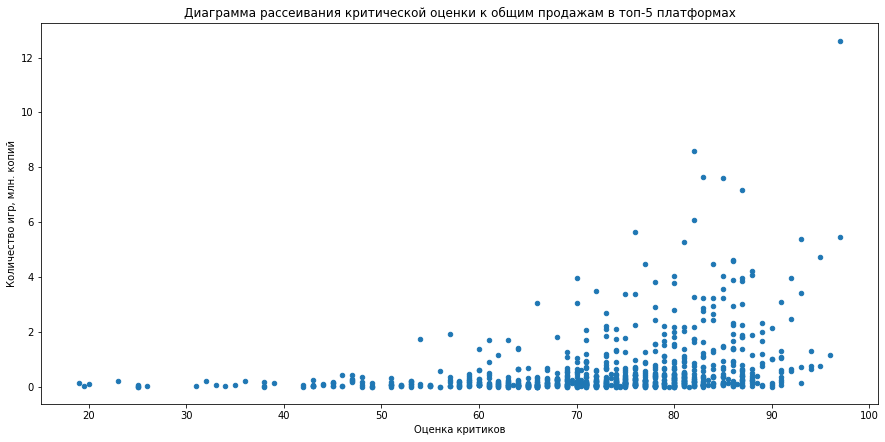

Коэффицент корреляции: 0.3092076746867278


In [60]:
top5.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(15, 7))
plt.title('Диаграмма рассеивания критической оценки к общим продажам в топ-5 платформах')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество игр, млн. копий')
plt.show()
print('Коэффицент корреляции:',top5['critic_score'].corr(top5['total_sales']))

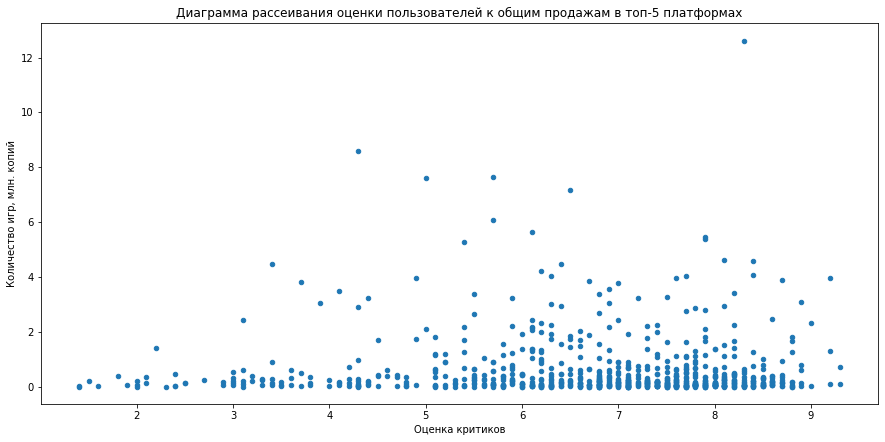

Коэффицент корреляции: -0.023905141350462268


In [61]:
top5.plot(kind='scatter', x='user_score', y='total_sales', figsize=(15, 7))
plt.title('Диаграмма рассеивания оценки пользователей к общим продажам в топ-5 платформах')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество игр, млн. копий')
plt.show()
print('Коэффицент корреляции:',top5['user_score'].corr(top5['total_sales']))

#### Вывод по 3.7.
Аналогичен пункту 3.6: оценки пользователей и критиков практически не влияют на продажи игр независимо от популярности платформы.

### 3.8 Общее распределение игр по жанрам

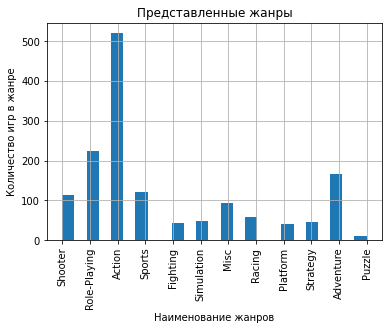

genre
Action          520
Role-Playing    223
Adventure       166
Sports          122
Shooter         114
Name: total_sales, dtype: int64

In [80]:
#строю гистограмму для отображения актуальных жанров для различных игровых платформ
top5['genre'].hist(bins=25)
plt.title('Представленные жанры')
plt.xlabel('Наименование жанров')
plt.xticks(rotation = 90)
plt.ylabel('Количество игр в жанре')
plt.show()

#смотрю топ-5 жанров
top5.groupby('genre')['total_sales'].count().sort_values(ascending=False).head()

Самые популярные жанры в индустрии Action(боевик), Role-Playing(ролевые игры) и Adventure(приключения). Замыкают пятёрку лидеров Sports(спортивные) и Shooter(стрелялки).

Далее рассмотриваю наиболее прибыльные жанры. 

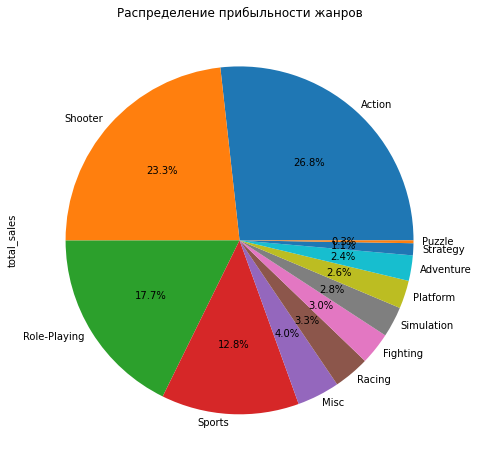

total_sales
genre                    
Action             184.43
Shooter            160.23
Role-Playing       122.01
Sports              88.21
Misc                27.28

In [63]:
top5.pivot_table(index=['genre'], values='total_sales', aggfunc='sum').sort_values('total_sales', ascending = False).plot(kind='pie', subplots=True, autopct='%1.1f%%', labeldistance=1.05, legend=False, figsize=(8, 8))
plt.title('Распределение прибыльности жанров')
plt.show()

top5.pivot_table(index=['genre'], values='total_sales', aggfunc='sum').sort_values('total_sales', ascending = False).head()

Распределение прибыльности жанров показало, что наиболее прибыльные жанры: Action, Shooter, Role-Playing. Закрывает топ5 Sports и Misc (разное).

In [64]:
#посчитаю отношение продаж в жанрах к количеству игр в жанрах и получу наиболее прибыльные жанры
col_genre = top5.groupby('genre')['total_sales'].count()
col_sale = top5.groupby('genre')['total_sales'].sum()
koeff = col_sale / col_genre * 100
koeff.sort_values(ascending=False)

genre
Shooter         140.552632
Sports           72.303279
Role-Playing     54.713004
Fighting         46.818182
Platform         44.875000
Simulation       40.020408
Racing           39.655172
Action           35.467308
Misc             29.021277
Strategy         16.361702
Puzzle           15.083333
Adventure         9.825301
Name: total_sales, dtype: float64

Имеет смысл изучить самые популярные жанры для самых популярных платформ

In [65]:
#цикл для подсчёта популярных жанров для каждой из популярной платформы
for q in top5['platform'].unique():
    print(f'Топ-5 жанров для платформы {q}')
    print(top5.query('platform == @q').pivot_table(
    index='genre', 
    values='total_sales', 
    aggfunc={'count','sum'}).sort_values(by='count', ascending=False).head())
    print()
    print()

Топ-5 жанров для платформы PS4
              count    sum
genre                     
Action          144  96.10
Role-Playing     51  28.99
Sports           46  55.61
Shooter          41  88.56
Adventure        28   6.34


Топ-5 жанров для платформы 3DS
              count    sum
genre                     
Action          116  34.04
Role-Playing     62  67.37
Misc             32   7.10
Adventure        27   3.33
Platform         15   8.79


Топ-5 жанров для платформы XOne
         count    sum
genre                
Action      85  37.31
Shooter     38  60.33
Sports      38  26.74
Racing      20   9.79
Misc        19   7.43


Топ-5 жанров для платформы PC
              count   sum
genre                    
Action           50  7.26
Shooter          32  9.84
Simulation       21  8.11
Strategy         20  5.03
Role-Playing     18  4.87


Топ-5 жанров для платформы PSV
              count    sum
genre                     
Action          125   9.72
Adventure        86   3.45
Role-Playing   

#### Вывод по 3.8. 
Наиболее прибыльный жанр Shooter. При небольшом количестве игр имеют большие продажи. Наименее прибыльный жанр,как оказалось, Adventure. Несмотря на невысокую рентабельность, в жанре Action больше всего игр, а жанр Misc входит в топ-5 по продажам в мире. 
Итого в мире топ-5 составляют: Shooter, Sports, Role-Playing, Action, Misc.


Так же для разных платформ топ-5 имеют отличия в актуальных жанрах, что обусловлено скорее всего спецификой самой платформы, на каких-то удобно играть в спортивные игры, на каких-то в приключенческие. 
<br>Таким образом актуальны для: 
<br>PS4: Action, Role-Playing, Sports, Shooter, Adventure;
<br>3DS: Action, Role-Playing, Misc, Adventure, Platform;
<br>XOne: Action, Shooter, Sports, Racing, Misc;
<br>PC: Action, Shooter, Simulation, Strategy, Role-Playing;
<br>PSV: Action, Adventure, Role-Playing, Misc, Sports. 

### 3.9. Игры-хиты для разных платформ
На графиках есть много выбросов. Можно узнать топ-5 игр для каждой платформы, так как именно эти игры являются самыми прибыльными. 

In [66]:
#цикл для подсчёта популярных жанров для каждой из популярной платформы
for q in top5['platform'].unique():
    print(f'Топ-5 игр для платформы {q}')
    print(top5.query('platform == @q').pivot_table(
    index='name', 
    values='total_sales', 
    aggfunc={'sum'}).sort_values(by='sum', ascending=False).head())
    print()
    print()

Топ-5 игр для платформы PS4
                                  sum
name                                 
Call of Duty: Black Ops 3       14.63
Grand Theft Auto V              12.62
FIFA 16                          8.58
Star Wars Battlefront (2015)     7.98
Call of Duty: Advanced Warfare   7.66


Топ-5 игр для платформы 3DS
                                             sum
name                                            
Pokemon X/Pokemon Y                        14.60
Pokemon Omega Ruby/Pokemon Alpha Sapphire  11.68
Super Smash Bros. for Wii U and 3DS         7.55
Pokemon Sun/Moon                            7.14
Tomodachi Life                              5.22


Топ-5 игр для платформы XOne
                                 sum
name                                
Call of Duty: Black Ops 3       7.39
Grand Theft Auto V              5.47
Call of Duty: Advanced Warfare  5.26
Halo 5: Guardians               4.49
Fallout 4                       4.22


Топ-5 игр для платформы PC
              

### ВЫВОД по исследовательскому анализу
1. Игры выпускаются с 1980 года по настоящее время. Заметный рост количества выпускаемых игр начинается с 1993 года, и достигает своего пика в 2007-2008 годах, далее идёт спад до уровня 2001 года.
2. Cамая долгоиграющая платформа это PC - игры для компьютеров выпускаются с 1985 года по текущий момент.
3. Актуальный период для исследования рынка начинается с 2013 года. 
4. Определились 5 потенциально актуальных платформ для прогноза на 2017 год: PS4, XOne, PSV, PC, 3DS. Наиболее актуальная - PS4.
5. На графиках видно, что есть много выбросов в разы больше, чем медианы продаж игр. Связано это с играми-хитами, которые обеспечивают основные продажи и соответствующие выбросы. 
6. Для платформы PS4, которая является лидером среди популярных платформ, зависимость между оценками и продажами практически отстутствует.
7. Для топ-5 платформ оценки пользователей и критиков практически не влияют на продажи игр независимо от популярности платформы.
8. Определились 10 потенциально актуальных жанров в зависимости от платформы: Shooter, Sports, Role-Playing, Action, Misc, Adventure, Racing, Simulation, Strategy, Platform. Наиболее прибыльный жанр Shooter, наиболее популярный Action. 

## 4. Портрет пользователя каждого региона

### 4.1. Распределение популярности платформ по регионам

<div class="alert alert-warning">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Здесь можно было бы воспользоваться методом subplots(), чтобы вывести графики на одной фигуре и они находились в одном ряде, так можно было бы легко сравнить пользователей из разных регионов между собой.
    
Тут есть основы matplotlib(и subplots пример тоже): https://pyprog.pro/mpl/mpl_main_components.html

#### Вывод по 4.1.

Самые популярные платформы в Северной Америке, Европе и других странах - PS4, XOne, 3DS. 
<br>В Японии лидирует 3DS, затем PSV и PS4.

### 4.2. Распределение жанров по регионам

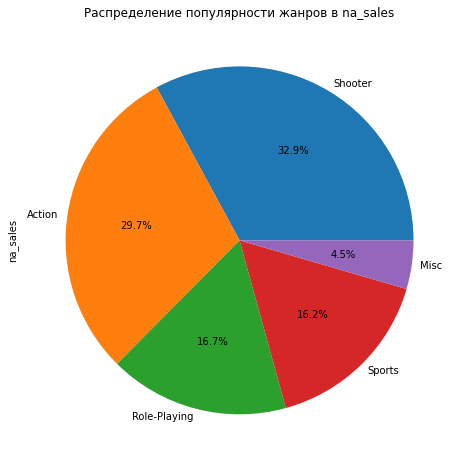

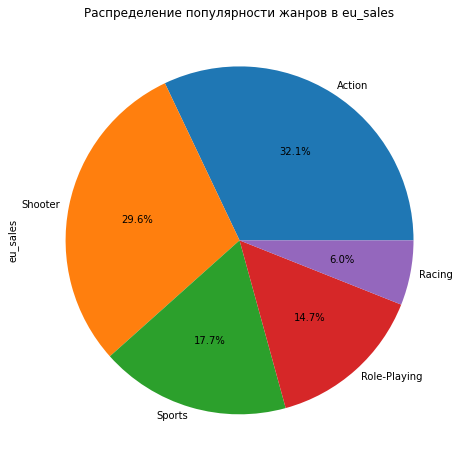

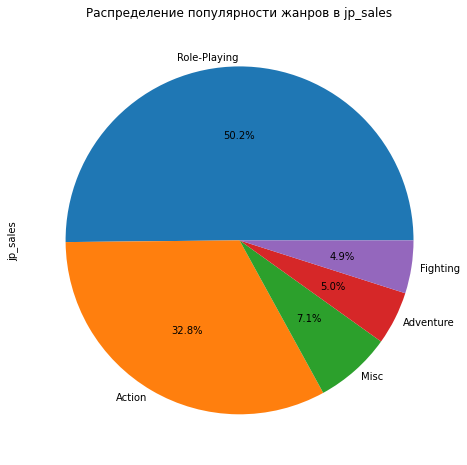

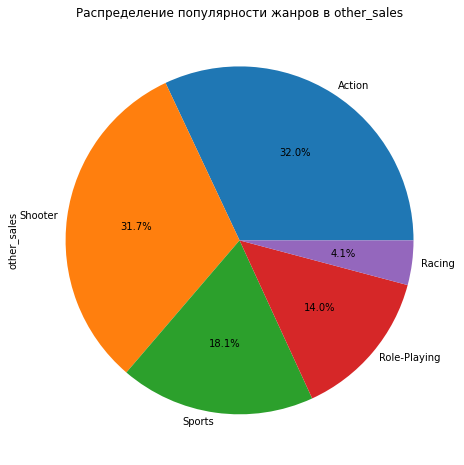

In [68]:
#цикл для подсчёта популярных жанров для каждой региона

for q in top5[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]:
    top5.groupby(by='genre').agg({q:'sum'}).sort_values(by=q, ascending=False).head(5).plot(kind='pie', subplots=True, autopct='%1.1f%%', labeldistance=1.05, legend=False, figsize=(8, 8))
    plt.title(f'Распределение популярности жанров в {q}')
    plt.show()

#### Вывод по 4.2. 

In [69]:
for q in top5[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]:    
    print(f'Топ-5 жанров по продажам игр в млн.копий в {q}')
    print(top5.groupby(by='genre').agg({q:'sum'}).sort_values(by=q, ascending=False).head(5))
    print()

Топ-5 жанров по продажам игр в млн.копий в na_sales
              na_sales
genre                 
Shooter          73.29
Action           66.06
Role-Playing     37.24
Sports           36.07
Misc             10.06

Топ-5 жанров по продажам игр в млн.копий в eu_sales
              eu_sales
genre                 
Action           68.74
Shooter          63.37
Sports           37.87
Role-Playing     31.53
Racing           12.91

Топ-5 жанров по продажам игр в млн.копий в jp_sales
              jp_sales
genre                 
Role-Playing     44.17
Action           28.91
Misc              6.28
Adventure         4.37
Fighting          4.33

Топ-5 жанров по продажам игр в млн.копий в other_sales
              other_sales
genre                    
Action              20.72
Shooter             20.55
Sports              11.74
Role-Playing         9.07
Racing               2.68



### 4.3. Распределение рейтинга ESRB в регионах

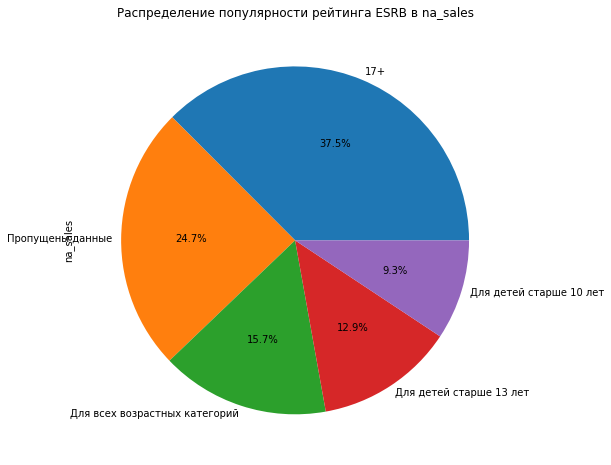

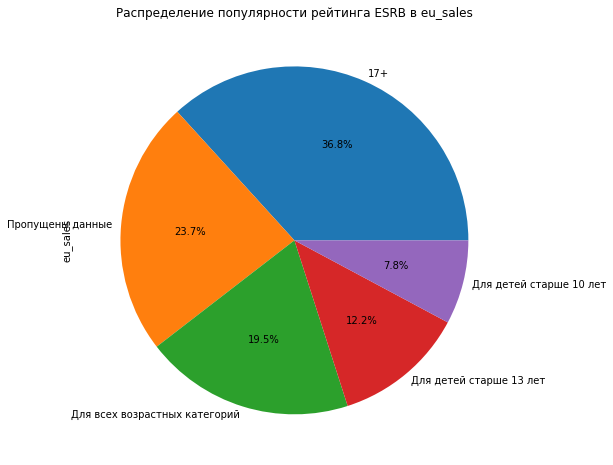

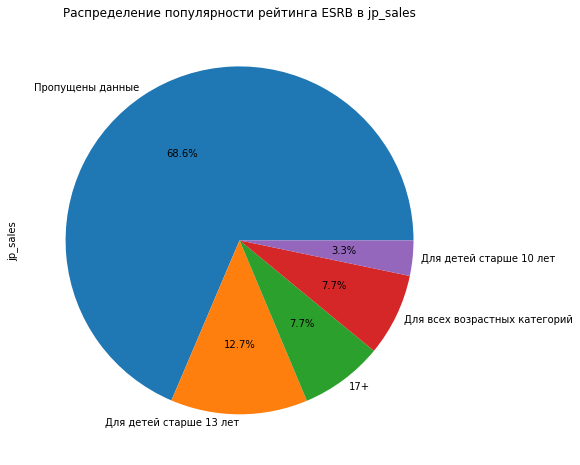

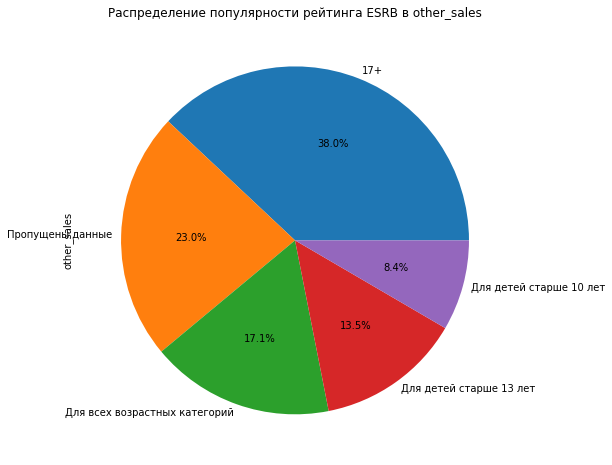

In [85]:
#распределение рейтинга ESRB в различных регионах 
for q in top5[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]:
    top5.groupby(by='total_rating_category').agg({q:'sum'}).sort_values(by=q, ascending=False).head(5).plot(kind='pie', subplots=True ,autopct='%1.1f%%', labeldistance=1.05, legend=False, figsize=(8, 8))
    plt.title(f'Распределение популярности рейтинга ESRB в {q}')
    plt.show()

#### Вывод по 4.3.

In [71]:
for q in top5[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]:
    print(f'ESRB по продажам игр в млн.копий в {q}')
    print(top5.groupby(by='total_rating_category').agg({q:'sum'}).sort_values(by=q, ascending=False).head(5))
    print()

ESRB по продажам игр в млн.копий в na_sales
                               na_sales
total_rating_category                  
17+                               96.04
Пропущены данные                  63.21
Для всех возрастных категорий     40.15
Для детей старше 13 лет           32.96
Для детей старше 10 лет           23.85

ESRB по продажам игр в млн.копий в eu_sales
                               eu_sales
total_rating_category                  
17+                               93.76
Пропущены данные                  60.49
Для всех возрастных категорий     49.71
Для детей старше 13 лет           31.20
Для детей старше 10 лет           19.94

ESRB по продажам игр в млн.копий в jp_sales
                               jp_sales
total_rating_category                  
Пропущены данные                  70.45
Для детей старше 13 лет           13.07
17+                                7.93
Для всех возрастных категорий      7.88
Для детей старше 10 лет            3.37

ESRB по продажам игр в мл

### ВЫВОД по портрету пользователя в каждом регионе

<br>Исходя из полученных данных можно сделать усреднённый портрет для каждого из регионов. 
<br><br>Для Северной Америки (СА) характерны игры на платформе PS4(42%) и XOne(36%). 
<br>Больше всего игрокам СА нравится играть в Shooter и Action - по 29% и 32% соответственно. На третьем месте спортивные игры. 
<br>Графики соответствеют предпочтениям пользователей - самые популярные игры 17+, порядка 40%. 
<br>Наименее популярные игры для детей старше 10 лет.

<br>Для Европы (Е) характерны игры на платформе PS4(55%). 
<br>Больше всего игрокам Е нравится играть в Shooter и Action. Распределение как и в СА. На третьем месте также спортивные игры. 
<br>Графики также соответствуют основным предпочтениям пользователей - 17+, порядка 40%. 
<br>Наименее популярные игры от 10+.
<br>Наименее популярные игры для детей старше 10 лет.

<br>Для Японии (Я) характерны игры на платформе 3DS - 66% процентов пользователей предпочитают эту платформу. 
<br>Любимые игры в Я - Role-Playing(50%) и Action(32%). 
<br>Для Я доля пропущенных данных составляет 66%. Вероятно это связано с тем, что в Японии есть собственная класификация игр и это не учтено в данном анализе. 
<br>Грфик показывает, что самый популянрый рейтинг - для подростков 13+.
<br>Наименее популярные игры для детей старше 10 лет.

<br>Для остальных стран (ОС) характерны игры на платформе PS4(64%). Другие платформы менее популярны. 
<br>Игроки из ОС предпочитают играть также в Shooter(32%) и Action(32%). На третьем месте также спортивные игры. 
<br>Порядка 40% занимают время игры с рейтингом 17+.
<br>Наименее популярные игры для детей старше 10 лет.

<br>Для подавляющего большинства пользователей характерны игры для взрослых с рейтингом 17+, что вероятно соотвествтует возрасту молодого человека 15-20 лет. Предполагаю, рейтинг ESRB никак не влияет на продажи игр в целом, а большая популярность той или иной платформы обусловлена играми-хитами. 

## 5. Проверка гипотез

Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

```
H_0: рейтинг ('user_score') пользователей "XOne" = рейтинг ('user_score') пользователей "PC"
H_a: рейтинг ('user_score') пользователей "XOne" != рейтинг ('user_score') пользователей "PC"
alpha = 0.05
```

In [72]:
from scipy import stats as st

In [73]:
#удаляю из датафрейма значения NAN
nonenan = top5.dropna()

In [74]:
#проверяю гипотезу

xone_total_score = nonenan[nonenan['platform'] =='XOne']['user_score']
pc_total_score = nonenan[nonenan['platform'] =='PC']['user_score']
alpha= 0.05
results = st.ttest_ind(xone_total_score, pc_total_score, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 0.10110243817896916
Не получилось отвергнуть нулевую гипотезу


Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные.

```
H_0: рейтинг ('user_score') жанра  "Action" = рейтинг ('user_score') жанра "Sports"
H_0: рейтинг ('user_score') жанра  "Action" != рейтинг ('user_score') жанра "Sports"
```

In [75]:
#проверяю гипотезу

action_total_score = nonenan[nonenan['genre'] =='Action']['user_score']
sports_total_score = nonenan[nonenan['genre'] =='Sports']['user_score']
alpha= 0.05
results = st.ttest_ind(action_total_score, sports_total_score, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 9.808020903624775e-10
Отвергаем нулевую гипотезу


### ВЫВОД по проверке гипотез 

Вывод по проверке первой гипотезы: пользовательский рейтинг платформ Xbox One и Personal Computer сопоставимы.

Вывод по проверке второй гипотезы: пользовательский рейтинг жанра Action несопоставим с пользовательским рейтингом жанра Sports.

## 6. Вывод. Рекоммендации

### 6.1. Вывод по проведённой работе


1. Данные для анализа предоставил интернет-магазин "Стримчик" в файле "games.csv". 
2. Данные нуждались в предобработке и проведены следующие преобразования:
<br>• Исправлен регистр наименований столбцов предоставленных данных;
<br>• исключены данные с пропущенными значениями в столбцах ['name'] и ['genre'];
<br>• исключены данные с пропущенными значениями в столбце ['year_of_release'], т.к. они составляли менее 5% данных и не влияют на исследовательский анализ;
<br>• столбцы ['na_sales '], ['eu_sales'], ['jp_sales'], ['other_sales'] не содержали в себе явных некорректных данных;
<br>• частично восстановленны пропущенные значения в столбце ['critic_score']с критической оценкой, порядка 12%;
<br>• в столбце ['user_score'] заменены значения TBD (требует определения) на NAN (пропущенные значения), так как невозможно восстановить оценку пользователей, в связи с этим увеличился процент пропущенных значений;
<br>• не подлежит восстановлению столбец ['rating'], так как рейтинг одной и той же игры может быть различен для разных платформ, однако создан дополнительно столбец с исследовательским рейтингом, объединив в себе часть значений для проведения исследовательского анализа. 

3. Проведён исследовательский анализ, в ходе которго установлено:
<br>• Игры выпускаются с 1980 года по настоящее время. Заметный рост количества выпускаемых игр начинается с 1993 года, и достигает своего пика в 2007-2008 годах, далее идёт спад до уровня 2001 года.
<br>• Cамая долгоиграющая платформа это PC - игры для компьютеров выпускаются с 1985 года по текущий момент.
<br>• Актуальный период для исследования рынка начинается с 2013 года. 
<br>• Определились 5 потенциально актуальных платформ для прогноза на 2017 год: PS4, XOne, PSV, PC, 3DS. Наиболее актуальная - PS4.
<br>• На графиках видно, что есть много выбросов в разы больше, чем медианы продаж игр. Связано это с играми-хитами, которые обеспечивают основные продажи и соответствующие выбросы. 
<br>• Для платформы PS4, которая является лидером среди популярных платформ, зависимость между оценками и продажами практически отстутствует.
<br>• Для топ-5 платформ оценки пользователей и критиков практически не влияют на продажи игр независимо от популярности платформы.
<br>• Определились 10 потенциально актуальных жанров в зависимости от платформы: Shooter, Sports, Role-Playing, Action, Misc, Adventure, Racing, Simulation, Strategy, Platform. Наиболее прибыльный жанр Shooter, наиболее популярный Action. 
<br>• Наиболее популярные игры для разных платформ:                           
Call of Duty: Black Ops 3,
Grand Theft Auto V,
FIFA 16,
Star Wars Battlefront (2015),
Call of Duty: Advanced Warfare,                       
Pokemon X/Pokemon Y,
Pokemon Omega Ruby/Pokemon Alpha Sapphire,
Super Smash Bros. for Wii U and 3DS,
Pokemon Sun/Moon,
Tomodachi Life,
Halo 5: Guardians,
Fallout 4,
The Sims 4,
StarCraft II: Heart of the Swarm,
SimCity (2013),
Battlefield 4,
Minecraft,
Killzone: Mercenary,
Final Fantasy X / X-2 HD Remaster,
Freedom Wars,
Borderlands 2.

4. Определён портрет пользователя каждого региона
Для Северной Америки (СА) характерны игры на платформе PS4(42%) и XOne(36%).
Больше всего игрокам СА нравится играть в Shooter и Action - по 29% и 32% соответственно. На третьем месте спортивные игры.
Графики соответствеют предпочтениям пользователей - самые популярные игры 17+, порядка 40%.
Наименее популярные игры для детей старше 10 лет.


Для Европы (Е) характерны игры на платформе PS4(55%).
Больше всего игрокам Е нравится играть в Shooter и Action. Распределение как и в СА. На третьем месте также спортивные игры.
Графики также соответствуют основным предпочтениям пользователей - 17+, порядка 40%.
Наименее популярные игры от 10+.
Наименее популярные игры для детей старше 10 лет.


Для Японии (Я) характерны игры на платформе 3DS - 66% процентов пользователей предпочитают эту платформу.
Любимые игры в Я - Role-Playing(50%) и Action(32%).
Для Я доля пропущенных данных составляет 66%. Вероятно это связано с тем, что в Японии есть собственная класификация игр и это не учтено в данном анализе.
Грфик показывает, что самый популянрый рейтинг - для подростков 13+.
Наименее популярные игры для детей старше 10 лет.


Для остальных стран (ОС) характерны игры на платформе PS4(64%). Другие платформы менее популярны.
Игроки из ОС предпочитают играть также в Shooter(32%) и Action(32%). На третьем месте также спортивные игры.
Порядка 40% занимают время игры с рейтингом 17+.
Наименее популярные игры для детей старше 10 лет.


Для подавляющего большинства пользователей характерны игры для взрослых с рейтингом 17+, что вероятно соотвествтует возрасту молодого человека 15-20 лет. Предполагаю, рейтинг ESRB никак не влияет на продажи игр в целом, а большая популярность той или иной платформы обусловлена играми-хитами.

5. Проверка заказанных гипотез 
<br>• Вывод по проверке первой гипотезы: пользовательский рейтинг платформ Xbox One и Personal Computer сопоставимы.
<br>• Вывод по проверке второй гипотезы: пользовательский рейтинг жанра Action несопоставим с пользовательским рейтингом жанра Sports.

### 6.2. Рекомендации

На основании проведенного исследовательского анализа есть ряд рекоммендаций. 
В данных много пропущенных значений в оценках пользователей, критиков, рейтинго. Вероятно это связано с тем, что для разных регионов существуют собственные рейтинговые системы, аналогичные ESRB.
ESRB актуальна для Северной Америки и Канады. В Японии существует своя система - CERO. В Европе - ELSPA. Для других стран так же есть собственные рейтинговые системы. Например, в России существует на законодательном уровне Российская возрастная рейтинговая система. Имеет смысл обратить на них внимание при закупке игр на 2017 год и указывать соответствюущий возрастной рейтинг по одной из систем. 

Определились топ-5 игровых платформ, которые будут актуальны в ближайший год, два: PS4, XOne, PSV, PC, 3DS. Наиболее актуальная - PS4. Имеет смысл закупать игры для них, как для наиболее популярных. 
В том числе следует обратить внимание на обновления хитовых игр, если будут выпускаться.
Так же стоит внимательно следить за новинками в основных жанрах Shooter, Sports, Role-Playing, Action, Misc. 
Для отдельных платформ актуальны жанры Adventure, Racing, Simulation, Strategy, Platform.

